In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}') 
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import scipy.stats
import figure_utils as fu
from return_gene_descriptions import return_gene_descriptions

from numba import njit 

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import config
import numpy
import random as rand

from random import randint,sample
from math import log

import sys
import os 


/tmp/ipykernel_62904/2966281898.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [12]:
def get_cmap(n, name='Set3'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [92]:
species = "Blautia_wexlerae_56130"


In [93]:
!ls /u/project/ngarud/Garud_lab/HumanizedMouse/merged_midas_output//species

Adlercreutzia_equolifaciens_60310   Collinsella_aerofaciens_61484
Akkermansia_muciniphila_55290	    Collinsella_sp_62205
Alistipes_finegoldii_56071	    Coprococcus_catus_62200
Alistipes_putredinis_61533	    Coprococcus_comes_61587
Anaerostipes_hadrus_55206	    Coprococcus_sp_62244
Bacteroides_cellulosilyticus_58046  Dorea_longicatena_59913
Bacteroides_finegoldii_57739	    Enterococcus_avium_44557
Bacteroides_fragilis_54507	    Enterococcus_faecalis_56297
Bacteroides_intestinalis_61596	    Enterococcus_faecium_56710
Bacteroides_massiliensis_44749	    Enterococcus_faecium_56947
Bacteroides_ovatus_58035	    Escherichia_coli_58110
Bacteroides_rodentium_59708	    Eubacterium_cylindroides_56237
Bacteroides_thetaiotaomicron_56941  Eubacterium_hallii_61477
Bacteroides_uniformis_57318	    Faecalibacterium_prausnitzii_61481
Bacteroides_vulgatus_57955	    Faecalibacterium_prausnitzii_62201
Barnesiella_intestinihominis_62208  Guyana_massiliensis_60772
Bifidobacterium_animalis_58116	    Lachnospira

In [201]:
gene_descriptions=return_gene_descriptions(species)

In [202]:
df_genes = pd.read_csv(f"{config.data_directory}/genes/{species}/genes_copynum.txt.bz2",sep="\t",index_col=0)

In [203]:
gene_info = pd.read_csv(f"/u/project/ngarud/Garud_lab/midas_db_v1.2/pan_genomes/{species}/gene_info.txt.gz",index_col=0,sep="\t")

In [204]:
mnum = [f[:2] for f in df_genes.columns]
msite = [f[2:].split("_")[0][:-1] for f in df_genes.columns]
mdiet = [f[2:].split("_")[0][-1] for f in df_genes.columns]
df_genes = df_genes.T
df_genes["mouse_number"] = mnum
df_genes.set_index('mouse_number', append=True, inplace=True)
df_genes["region"] = msite
df_genes.set_index('region', append=True, inplace=True)
df_genes["diet"] = mdiet
df_genes.set_index('diet', append=True, inplace=True)

df_genes.index.names = ["sample","mouse_number","region","diet"]
df_genes = df_genes.reorder_levels(["mouse_number","region","diet","sample"])
df_genes = df_genes.sort_index(level="diet")
df_genes = df_genes.T

In [205]:
df_genes = df_genes.where(np.logical_or(df_genes<0.05,df_genes>0.8),np.nan)

In [206]:
df_genes = df_genes.where(df_genes>0.05,0)
df_genes = df_genes.where(df_genes<0.8,1)

In [207]:
df_genes

mouse_number                                        M1  \
region                                              Ce   
diet                                                 C   
sample             M1CeC_CKDN220050952-1A_H7MMHDSX5_L3   
gene_id                                                  
1121115.4.peg.1000                                 0.0   
1121115.4.peg.1001                                 0.0   
1121115.4.peg.1002                                 0.0   
1121115.4.peg.1003                                 0.0   
1121115.4.peg.1004                                 0.0   
...                                                ...   
457412.4.rna.35                                    0.0   
457412.4.rna.43                                    0.0   
457412.4.rna.49                                    1.0   
457412.4.rna.52                                    0.0   
457412.4.rna.56                                    0.0   

mouse_number                                            \
region                                              Co   
diet                                                 C   
sample             M1CoC_CKDN220050958-1A_H7MMHDSX5_L2   
gene_id                                                  
1121115.4.peg.1000                                 0.0   
1121115.4.peg.1001                                 0.0   
1121115.4.peg.1002                                 0.0   
1121115.4.peg.1003                                 0.0   
1121115.4.peg.1004                                 0.0   
...                                                ...   
457412.4.rna.35                                    0.0   
457412.4.rna.43                                    0.0   
457412.4.rna.49                                    1.0   
457412.4.rna.52                                    0.0   
457412.4.rna.56                                    0.0   

mouse_number                                           \
region                                              D   
diet                                                C   
sample             M1DC_CKDN220050964-1A_H7MMHDSX5_L2   
gene_id                                                 
1121115.4.peg.1000                                0.0   
1121115.4.peg.1001                                0.0   
1121115.4.peg.1002                                0.0   
1121115.4.peg.1003                                0.0   
1121115.4.peg.1004                                0.0   
...                                               ...   
457412.4.rna.35                                   0.0   
457412.4.rna.43                                   0.0   
457412.4.rna.49                                   1.0   
457412.4.rna.52                                   0.0   
457412.4.rna.56                                   0.0   

mouse_number                                           \
region                                              I   
diet                                                C   
sample             M1IC_CKDN220050976-1A_H7MMHDSX5_L2   
gene_id                                                 
1121115.4.peg.1000                                0.0   
1121115.4.peg.1001                                0.0   
1121115.4.peg.1002                                0.0   
1121115.4.peg.1003                                0.0   
1121115.4.peg.1004                                0.0   
...                                               ...   
457412.4.rna.35                                   0.0   
457412.4.rna.43                                   0.0   
457412.4.rna.49                                   1.0   
457412.4.rna.52                                   0.0   
457412.4.rna.56                                   0.0   

mouse_number                                           \
region                                              J   
diet                                                C   
sample             M1JC_CKDN220050970-1A_H7MMHDSX5_L2   
gene_id                                                 
1121115.4.peg.1000             

In [149]:
#df_genes = df_genes.loc[(df_genes > 0.05).T.sum() > 10]
#df_genes = df_genes.replace(0,np.nan)

In [150]:
#df_genes = (df_genes.T/df_genes.T.max()).T

In [216]:
var_sites = (df_genes.T.xs("C",level="diet").mean() - df_genes.T.xs("G",level="diet").mean()).sort_values().dropna()[:10].index


In [209]:
mnum_sample_dic = {m:np.argwhere(df_genes.T.index.get_level_values("mouse_number") == m).ravel() for m in list(set(mnum))}


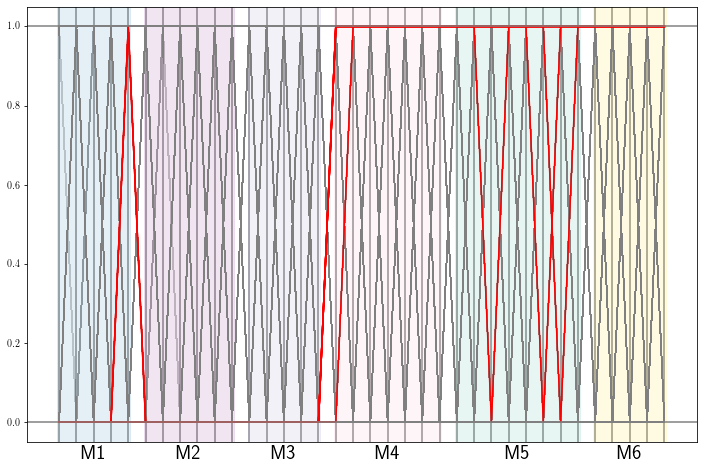

In [219]:
cmap = get_cmap(len(list(set(mnum))))

fig,ax = plt.subplots(figsize=(12,8))

ax.plot(df_genes.T.values,color="grey",alpha=.007);

ax.plot(df_genes.loc[var_sites].T.values,color="red")

#ax.semilogy()

major_x = []
minor_x = []
labels = []

i = 0
for key, item in mnum_sample_dic.items():
    xmin = item.min() 
    xmax = item.max()
    ax.axvspan(xmin - .1,xmax+.1,alpha=.2,color=cmap(i))
    for e in item:
        ax.axvline(e,color="k",zorder=0,alpha=.5)

    if xmin != xmax:
        major_x.extend([xmin,(xmax + xmin)/2,xmax])
        minor_x.append((xmax + xmin)/2)
        labels.extend(["",key,""])
    else:
        major_x.append(xmin)
        minor_x.append(xmax)
        labels.extend([key])        
    i+=1

ax.set_xticks(major_x)
ax.set_xticks(minor_x, minor = True)
ax.set_xticklabels(labels);

ax.axhline(0,color="grey")
ax.axhline(1,color="grey")

ax.tick_params(axis = 'x', which = 'major', length=0,labelsize = 20)
ax.tick_params(axis = 'x', which = 'minor', length = 10,labelsize = 0)

#ax.set_ylim([1e-2,1.1])

In [218]:
gene_descriptions.loc[[s for s in gene_info.loc[var_sites].centroid_95.values if s in gene_descriptions.index]]

1121115.4.peg.1159                                 hypothetical protein
1121115.4.peg.1132                    FIG00533189: hypothetical protein
1121115.4.peg.325                                  hypothetical protein
1121115.4.peg.3532                                 hypothetical protein
1121115.4.peg.287     4-carboxymuconolactone decarboxylase (EC 4.1.1...
1121115.4.peg.3520                    FIG00515792: hypothetical protein
1121115.4.peg.302     ABC transporter-like sensor linked response re...
dtype: object

In [217]:
df_genes.loc[var_sites]

mouse_number                                        M1  \
region                                              Ce   
diet                                                 C   
sample             M1CeC_CKDN220050952-1A_H7MMHDSX5_L3   
gene_id                                                  
1121115.4.peg.1159                                 0.0   
1121115.4.peg.1132                                 0.0   
1121115.4.peg.325                                  0.0   
457412.4.peg.1927                                  0.0   
1121115.4.peg.3532                                 0.0   
1121115.4.peg.287                                  0.0   
1121115.4.peg.3520                                 0.0   
457412.4.peg.917                                   0.0   
1121115.4.peg.302                                  0.0   
457412.4.peg.920                                   0.0   

mouse_number                                            \
region                                              Co   
diet                                                 C   
sample             M1CoC_CKDN220050958-1A_H7MMHDSX5_L2   
gene_id                                                  
1121115.4.peg.1159                                 0.0   
1121115.4.peg.1132                                 0.0   
1121115.4.peg.325                                  0.0   
457412.4.peg.1927                                  0.0   
1121115.4.peg.3532                                 0.0   
1121115.4.peg.287                                  0.0   
1121115.4.peg.3520                                 0.0   
457412.4.peg.917                                   0.0   
1121115.4.peg.302                                  0.0   
457412.4.peg.920                                   0.0   

mouse_number                                           \
region                                              D   
diet                                                C   
sample             M1DC_CKDN220050964-1A_H7MMHDSX5_L2   
gene_id                                                 
1121115.4.peg.1159                                0.0   
1121115.4.peg.1132                                0.0   
1121115.4.peg.325                                 0.0   
457412.4.peg.1927                                 0.0   
1121115.4.peg.3532                                0.0   
1121115.4.peg.287                                 0.0   
1121115.4.peg.3520                                0.0   
457412.4.peg.917                                  0.0   
1121115.4.peg.302                                 0.0   
457412.4.peg.920                                  0.0   

mouse_number                                           \
region                                              I   
diet                                                C   
sample             M1IC_CKDN220050976-1A_H7MMHDSX5_L2   
gene_id                                                 
1121115.4.peg.1159                                0.0   
1121115.4.peg.1132                                0.0   
1121115.4.peg.325                                 0.0   
457412.4.peg.1927                                 0.0   
1121115.4.peg.3532                                0.0   
1121115.4.peg.287                                 0.0   
1121115.4.peg.3520                                0.0   
457412.4.peg.917                                  0.0   
1121115.4.peg.302                                 0.0   
457412.4.peg.920                                  0.0   

mouse_number                                           \
region                                              J   
diet                                                C   
sample             M1JC_CKDN220050970-1A_H7MMHDSX5_L2   
gene_id                                                 
1121115.4.peg.1159                                0.0   
1121115.4.peg.1132                                0.0   
1121115.4.peg.325                                 0.0   
457412.4.peg.1927                                 0.0   
1121115.4.peg.3532               

In [143]:
df_genes

mouse_number                                        M1  \
region                                              Ce   
diet                                                 C   
sample             M1CeC_CKDN220050952-1A_H7MMHDSX5_L3   
gene_id                                                  
1121115.4.peg.1000                                 0.0   
1121115.4.peg.1001                                 0.0   
1121115.4.peg.1002                                 0.0   
1121115.4.peg.1003                                 0.0   
1121115.4.peg.1004                                 0.0   
...                                                ...   
457412.4.rna.35                                    0.0   
457412.4.rna.43                                    0.0   
457412.4.rna.49                                    0.0   
457412.4.rna.52                                    0.0   
457412.4.rna.56                                    0.0   

mouse_number                                            \
region                                              Co   
diet                                                 C   
sample             M1CoC_CKDN220050958-1A_H7MMHDSX5_L2   
gene_id                                                  
1121115.4.peg.1000                            0.000000   
1121115.4.peg.1001                            0.067518   
1121115.4.peg.1002                            0.000000   
1121115.4.peg.1003                            0.000000   
1121115.4.peg.1004                            0.000000   
...                                                ...   
457412.4.rna.35                               0.000000   
457412.4.rna.43                               0.000000   
457412.4.rna.49                               0.000000   
457412.4.rna.52                               0.000000   
457412.4.rna.56                               0.000000   

mouse_number                                           \
region                                              D   
diet                                                C   
sample             M1DC_CKDN220050964-1A_H7MMHDSX5_L2   
gene_id                                                 
1121115.4.peg.1000                                0.0   
1121115.4.peg.1001                                0.0   
1121115.4.peg.1002                                0.0   
1121115.4.peg.1003                                0.0   
1121115.4.peg.1004                                0.0   
...                                               ...   
457412.4.rna.35                                   0.0   
457412.4.rna.43                                   0.0   
457412.4.rna.49                                   0.0   
457412.4.rna.52                                   0.0   
457412.4.rna.56                                   0.0   

mouse_number                                           \
region                                              I   
diet                                                C   
sample             M1IC_CKDN220050976-1A_H7MMHDSX5_L2   
gene_id                                                 
1121115.4.peg.1000                                0.0   
1121115.4.peg.1001                                0.0   
1121115.4.peg.1002                                0.0   
1121115.4.peg.1003                                0.0   
1121115.4.peg.1004                                0.0   
...                                               ...   
457412.4.rna.35                                   0.0   
457412.4.rna.43                                   0.0   
457412.4.rna.49                                   0.0   
457412.4.rna.52                                   0.0   
457412.4.rna.56                                   0.0   

mouse_number                                           \
region                                              J   
diet                                                C   
sample             M1JC_CKDN220050970-1A_H7MMHDSX5_L2   
gene_id                                                 
1121115.4.peg.1000             

In [159]:
df_genes

mouse_number                                        M1  \
region                                              Ce   
diet                                                 C   
sample             M1CeC_CKDN220050952-1A_H7MMHDSX5_L3   
gene_id                                                  
1121115.4.peg.1000                                 0.0   
1121115.4.peg.1001                                 0.0   
1121115.4.peg.1002                                 0.0   
1121115.4.peg.1003                                 0.0   
1121115.4.peg.1004                                 0.0   
...                                                ...   
457412.4.rna.35                                    0.0   
457412.4.rna.43                                    0.0   
457412.4.rna.49                                    0.0   
457412.4.rna.52                                    0.0   
457412.4.rna.56                                    0.0   

mouse_number                                            \
region                                              Co   
diet                                                 C   
sample             M1CoC_CKDN220050958-1A_H7MMHDSX5_L2   
gene_id                                                  
1121115.4.peg.1000                                 0.0   
1121115.4.peg.1001                                 0.0   
1121115.4.peg.1002                                 0.0   
1121115.4.peg.1003                                 0.0   
1121115.4.peg.1004                                 0.0   
...                                                ...   
457412.4.rna.35                                    0.0   
457412.4.rna.43                                    0.0   
457412.4.rna.49                                    0.0   
457412.4.rna.52                                    0.0   
457412.4.rna.56                                    0.0   

mouse_number                                           \
region                                              D   
diet                                                C   
sample             M1DC_CKDN220050964-1A_H7MMHDSX5_L2   
gene_id                                                 
1121115.4.peg.1000                                0.0   
1121115.4.peg.1001                                0.0   
1121115.4.peg.1002                                0.0   
1121115.4.peg.1003                                0.0   
1121115.4.peg.1004                                0.0   
...                                               ...   
457412.4.rna.35                                   0.0   
457412.4.rna.43                                   0.0   
457412.4.rna.49                                   0.0   
457412.4.rna.52                                   0.0   
457412.4.rna.56                                   0.0   

mouse_number                                           \
region                                              I   
diet                                                C   
sample             M1IC_CKDN220050976-1A_H7MMHDSX5_L2   
gene_id                                                 
1121115.4.peg.1000                                0.0   
1121115.4.peg.1001                                0.0   
1121115.4.peg.1002                                0.0   
1121115.4.peg.1003                                0.0   
1121115.4.peg.1004                                0.0   
...                                               ...   
457412.4.rna.35                                   0.0   
457412.4.rna.43                                   0.0   
457412.4.rna.49                                   0.0   
457412.4.rna.52                                   0.0   
457412.4.rna.56                                   0.0   

mouse_number                                           \
region                                              J   
diet                                                C   
sample             M1JC_CKDN220050970-1A_H7MMHDSX5_L2   
gene_id                                                 
1121115.4.peg.1000             